# Meta Llama 3.1 405B Instruct with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.1 405B Instruct with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v213
MODEL_ID = "meta.llama3-1-405b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 3
INFO:root:Completed: 0
INFO:root:Completed: 2
INFO:root:Completed: 1
INFO:root:Completed: 4
INFO:root:Completed: 6
INFO:root:Completed: 5
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 7
INFO:root:Completed: 12
INFO:root:Completed: 10
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 15
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 24
INFO:root:Completed: 22
INFO:root:Completed: 26
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 5s, sys: 5.29 s, total: 1min 10s
Wall time: 29min 54s


[{'0004.91306_cites_88240.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 2073,
   'output_tokens': 89,
   'prediction': 'no',
   'confidence': 0.987,
   'rationale': 'The passage discusses and references the Target Case, Texas v. Hardenberg, 10 Wall. 68, but does not indicate that it has been overruled. The court actually reconsiders and reaffirms the grounds of the former decision, suggesting that the Target Case remains valid.',
   'raw_results': '\n\n```\n{\n  "overruled": "no",\n  "confidence": 0.987,\n  "rationale": "The passage discusses and references the Target Case, Texas v. Hardenberg, 10 Wall. 68, but does not indicate that it has been overruled. The court actually reconsiders and reaffirms the grounds of the former decision, suggesting that the Target Case remains valid."\n}\n```'}},
 {'0001.91306_cites_88061.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 2850,
   'output_tokens': 91,
   'prediction': 'yes',
   'confidence': 0

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,2073,89,no,0.987,The passage discusses and references the Targe...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,2850,91,yes,0.950,The passage explicitly states that the positio...,"\n\n```\n{\n ""overruled"": ""yes"",\n ""confiden..."
2,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,2101,85,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,2562,97,no,0.950,The passage discusses and examines the Target ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,2074,119,no,0.950,"The passage discusses the Target Case, Hunting...","\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/3.llama/0.llama31_405B_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

0

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/3.llama/0.llama31_405B_v213_prompt.csv")

In [7]:
prediction_df["prediction"].isna().sum()

0

In [9]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

2

In [10]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 1067
INFO:root:Completed: 1008


CPU times: user 121 ms, sys: 20.5 ms, total: 142 ms
Wall time: 4.67 s


[{'1085.118386_cites_117967.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 6008,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'None of the passages indicate that the Target Case has been overruled. While the Acting Case discusses the Target Case, it does not take any Explicit or Implicit Negative Actions to overrule it.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.999,\n  "rationale": "None of the passages indicate that the Target Case has been overruled. While the Acting Case discusses the Target Case, it does not take any Explicit or Implicit Negative Actions to overrule it."\n}\n```'}},
 {'1027.118011_cites_92702.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 10635,
   'output_tokens': 79,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'While the Acting Case discusses the Target Case at length, it does not take Explicit or Implicit Negative Actions against it. In

In [11]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,1085.118386_cites_117967.txt,cohere.command-r-plus-v1:0,6008,71,no,0.999,None of the passages indicate that the Target ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,1027.118011_cites_92702.txt,cohere.command-r-plus-v1:0,10635,79,no,0.999,While the Acting Case discusses the Target Cas...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [12]:
retry_df["prediction"].isna().sum()

0

In [13]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [14]:
prediction_df = comb_prediction_df

In [15]:
len(prediction_df)

1084

In [16]:
prediction_df["prediction"].isna().sum()

0

In [17]:
prediction_df.to_csv("predictions/3.llama/0.llama31_405B_v213_prompt.csv", index=False)

# Combine the prediction results with label for evaluation

In [8]:
assert len(df) == len(prediction_df)

In [9]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,2850,91,yes,0.950,The passage explicitly states that the positio...,"\n\n```\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,2562,97,no,0.950,The passage discusses and examines the Target ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,2101,85,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,2073,89,no,0.987,The passage discusses and references the Targe...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,2074,119,no,0.950,"The passage discusses the Target Case, Hunting...","\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [10]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [11]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["prediction"].value_counts()

prediction
no     878
yes    206
Name: count, dtype: int64

In [13]:
eval_df["input_tokens"].sum()

3451260

In [14]:
eval_df["output_tokens"].sum()

111363

In [15]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [16]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.92      0.94       935
         Yes       0.62      0.85      0.72       149

    accuracy                           0.91      1084
   macro avg       0.80      0.88      0.83      1084
weighted avg       0.93      0.91      0.91      1084



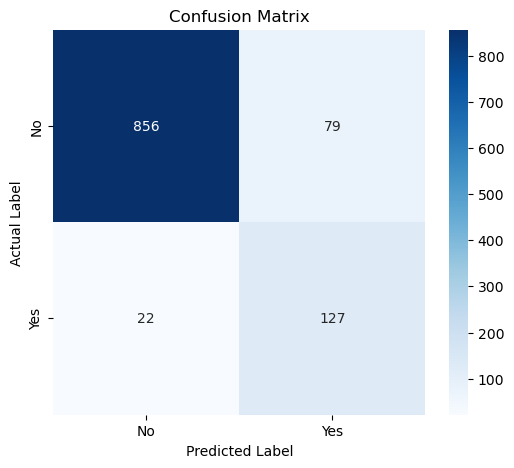

In [17]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.91
Precision: 0.62
Recall: 0.85
F-score: 0.72
Specificity: 0.92
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 127
True negatives: 856
False positives: 79
False negatives: 22


In [19]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

79

In [20]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

22

# Save the evaluation df

In [21]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,2850,91,yes,0.950,The passage explicitly states that the positio...,"\n\n```\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,2562,97,no,0.950,The passage discusses and examines the Target ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,2101,85,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,2073,89,no,0.987,The passage discusses and references the Targe...,"\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,2074,119,no,0.950,"The passage discusses the Target Case, Hunting...","\n\n```\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [22]:
eval_df.to_csv("predictions/3.llama/0.llama31_405B_v213_prompt_eval.csv", index=False)